In [1]:
import sys
#sys.path.insert(0, '/Users/qd/PycharmProjects/rydanalysis/')
from rydanalysis import *
import matplotlib.pyplot as plt
#path='/run/user/1000/gvfs/smb-share:server=axion.local,share=rydberg/data/2020_02_12/EIT_resonancescan'
import seaborn as sns
from pathlib import Path
sns.set_style("dark")
sns.set_style("darkgrid")
import matplotlib as mpl
path='/Users/qd/Desktop/DATA/01_Twolevel_versus_Threelevel_pABSx0-8_pBlue15mV/'
path = Path(path)

In [2]:
seq = rydanalysis.OldStructure(path)
#seq.path='/Users/qd/Schreibtisch/DATA/'

'raw_data.h5' already exists. Do you want to load from this file (Y) or from the old folder structure (N)? [Y/n]: 

In [3]:
seq.save_raw_data()

C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\qd\Anaconda3\envs\rydanalysis\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, whiten=False, svd_solver=auto, tol=0.0, iterated_power=auto, random_state=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


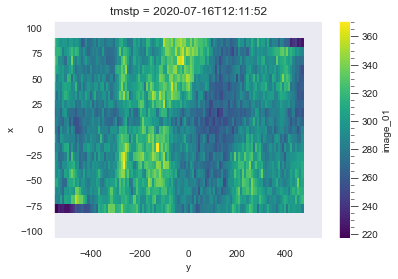

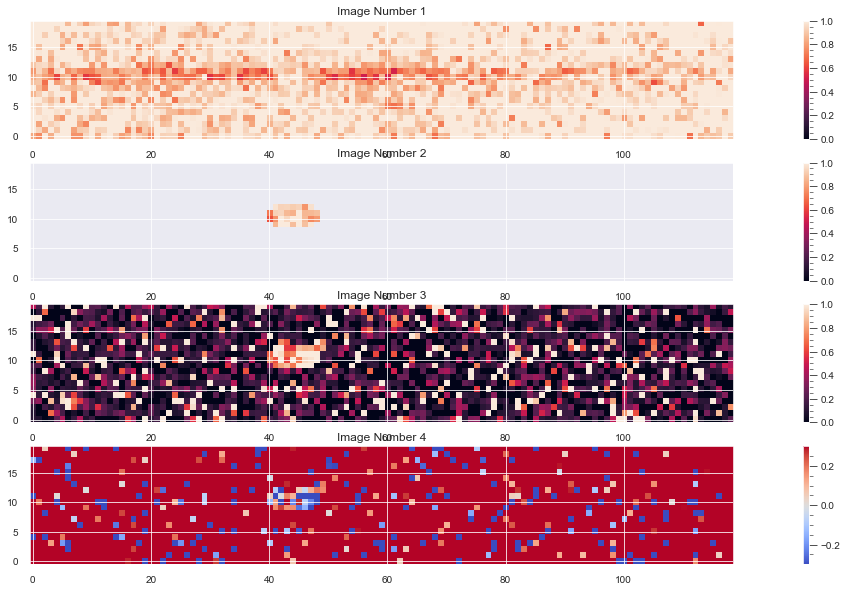

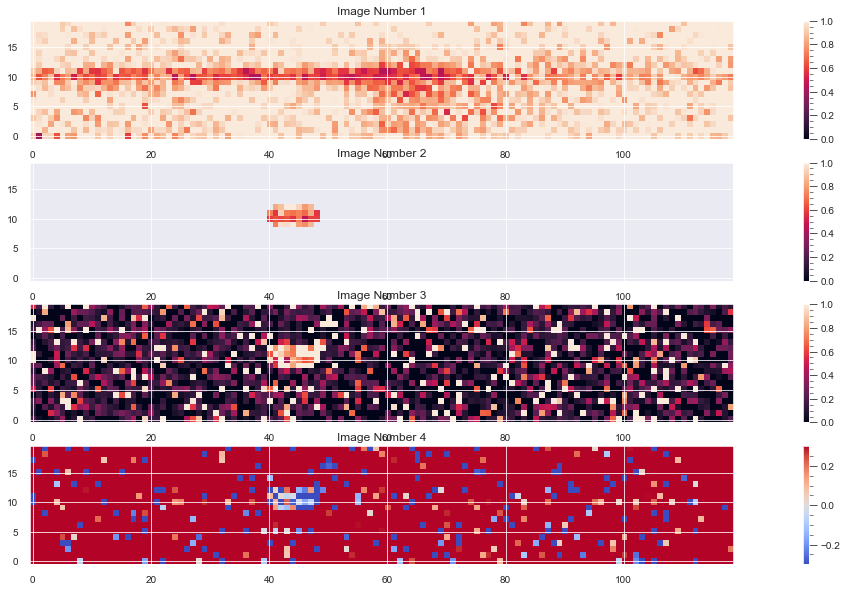

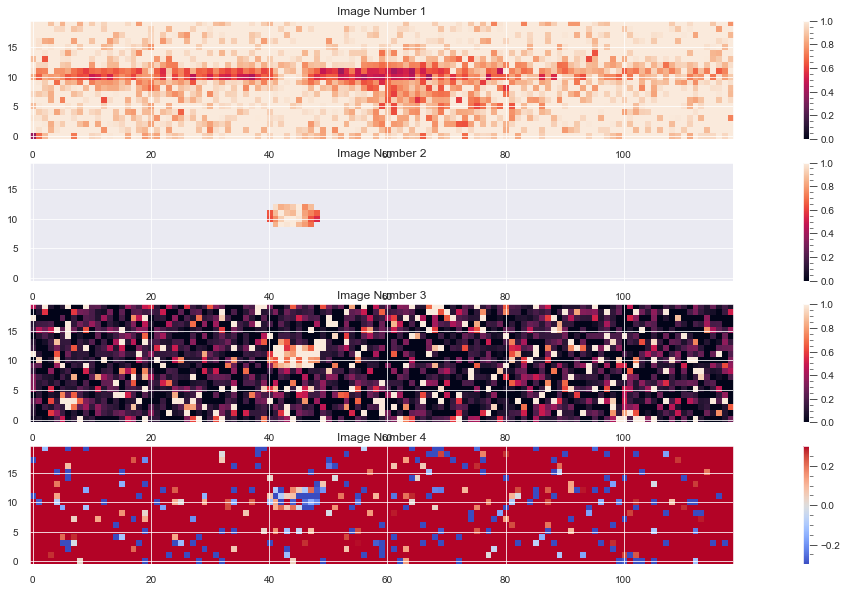

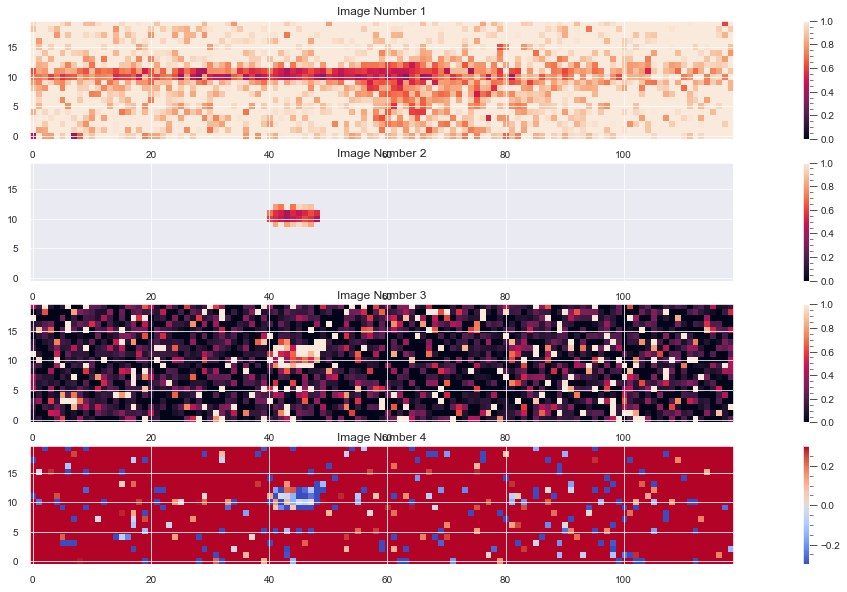

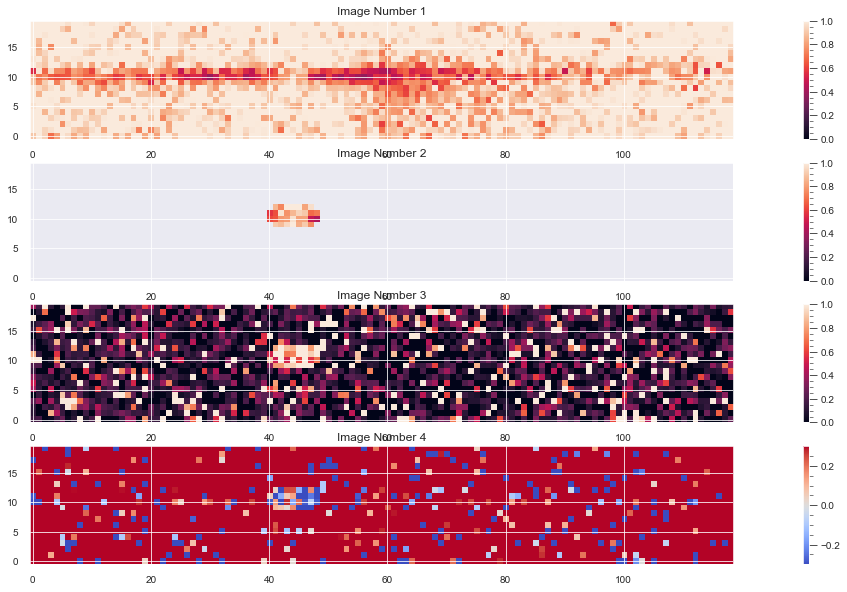

In [10]:
data = seq.raw_data#.groupby('Test1').mean()

#mask = (abs(images.x)) * (abs(images.y))
#image = images.image_01.sel(dDDSred=0, method='nearest').where(mask)/images.image_03.sel(dDDSred=0, method='nearest').where(mask)#-images.image_05.sel(dDDSred=0, method='nearest').where(mask)
two_level=EITMask(image = data.image_01).get_mask(center_x=18,center_y=-160,width_x=25,width_y=800,width_eit=30)
roi=EllipticalMask(image = data.image_01).get_mask(center_x=12,center_y=-168,width_x=20,width_y=40)
elliptical=EllipticalMask(image = data.image_01).get_mask(center_x=-20,center_y=-100,width_x=60,width_y=1000)
#fringemask=PolygonMask(image = data.image_01).get_mask([13,-200])
crop = RectangularMask(image = data.image_01).get_mask(center_x=5,center_y=-175, width_x=85, width_y=650)

IEI=InteractionEnhancedImaging.from_raw_data(seq.raw_data,mask=elliptical,roi_mask=roi,crop_mask=crop,
                                             absorption_ref_kwargs=dict(Test1=1))
AI=AbsorptionImaging.from_raw_data(seq.raw_data,crop_mask=crop)

#print(absorptionpic.calculate_density(images.image_01.sel(tEXC=0, method='nearest')))
IEI.absorption_reference[0].plot()
#print(center_of_mass(imag[n].where(eit_roi)))

imag=IEI.transmission_impurity
AIimag=AI.transmission

for n in range(0,5):

    fig,ax = plt.subplots(4,figsize=(25,10))

    ax[0].set_title('Image Number '+str(1))
    ax[0].imshow(AIimag[n], origin='bottom',vmin=0, vmax=1)
    fig.colorbar(ax[0].imshow(AIimag[n], origin='bottom',vmin=0, vmax=1),ax=ax[0])

    ax[1].set_title('Image Number '+str(2))
    ax[1].imshow(AIimag[n].where(roi), origin='bottom',vmin=0, vmax=1)
    fig.colorbar(ax[1].imshow(AIimag[n].where(roi), origin='bottom',vmin=0, vmax=1),ax=ax[1])

    ax[2].set_title('Image Number '+str(3))
    ax[2].imshow(imag[n], origin='bottom',vmin=0, vmax=1)
    fig.colorbar(ax[2].imshow(imag[n], origin='bottom',vmin=0, vmax=1),ax=ax[2])

    ax[3].set_title('Image Number '+str(4))
    ax[3].imshow(AIimag[n]-imag[n], origin='bottom',vmin=-0.3, vmax=0.3)
    fig.colorbar(ax[3].imshow(AIimag[n]-imag[n], origin='bottom',vmin=-0.3, vmax=0.3,cmap='coolwarm'),ax=ax[3])

    plt.show()

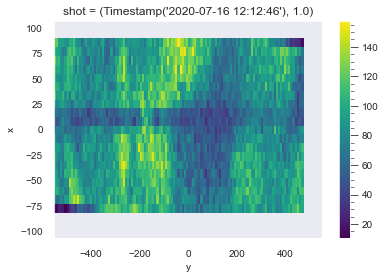

In [5]:
#absorptionpic.absorption_reference[0].plot()
a=AI.reference[0]#-simple.background
b=IEI.absorption_images[10]
b.plot()

In [6]:
roi=eit_roi.where(elliptical)
roi.plot()

NameError: name 'eit_roi' is not defined

In [ ]:
(pca.decompose_images(np.logical_not(imag[n].where(eit_roi).isnull()))-pca.decompose_images(imag[n])).mean()

In [ ]:
imag[n].where(eit_roi).plot()

In [ ]:
im=pca.decompose_images(np.logical_not(imag[n].where(eit_roi).isnull()))

np.logical_not(imag[n].where(eit_roi).isnull()).plot()

fig,ax = plt.subplots(2,1,figsize=(25,10))



ax[0].set_title('Image Number '+str(1))
ax[0].imshow(im, origin='bottom',vmin=0, vmax=1)
fig.colorbar(ax[0].imshow(im, origin='bottom',vmin=0, vmax=1),ax=ax[0])


In [ ]:
imag[n].std()
sensor=elliptical.where(crop)
sensor.plot()
